<a href="https://colab.research.google.com/github/khagerthey/VIS1/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import time, os, sys, re
import zipfile, json, datetime, string 
import numpy as np
from statistics import *

import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib                                                 

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() 

#aok good; for future please update like i did with magic command %matplotlib inline  and plt.style.use('default')

%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
plt.style.available #list available styles :) may install more
plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

Using matplotlib backend: <object object at 0x7fbccf9277c0>


#Resources

Price percentage increase throughout the years via NasDaq:
Glass- https://data.nasdaq.com/data/FRED/PCU32723272-producer-price-index-by-industry-glass-and-glass-product-manufacturing

In the case that my company would like to continue using glass, Borosilicate is a great glass alternative to Soda-lime.
Below is a table sourced from Kopp Glass. https://www.koppglass.com/blog/3-common-glass-types-properties-and-applications
Below is a table comparision of the material compounds of each glass type. Table sourced from CamLab. https://camblab.info/borosilicate-glass-vs-soda-lime-glass-vs-pyrex-what-is-the-difference/


PS4:
1. tell a story with vis, say 1-10 graphs, the fewer the better!, focus on what the data are telling us, make it engaging and utilitarian/useful 
2. don’t overcomplicate, best stories are simple (but be thorough, do the work, do robustness checks, triangulate, etc–all of that in notebook, but then the story you tell and present is basic and simple, top of the iceberg, the choisest, the cream of the crop)–its like top research say in nature or science–it’s a page or two (but its based on say 20 or 50 pages of output in appendix or supplementray material) 

This is going to be a rough draft of the final project. This back to original hypothesis and research.


My mission is to find the cause for glass breakages and a realistic solution to the problem that would satisfy the company.


What is my story?

Company is experiencing excessive glass breakages. This is an issue because it is costly and dangerous for the consumer.

How do you know? *insert current glass breakage stats*
- Compare lines to target main issue...
there is no data to compare, company only concerned with line 3 atm
- Once line is identified, look into type of glass



In [36]:
CHGlass=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/TOTAL%20SUM.csv')
CHGlass
#POs are product orders, below is the total amount of material ordered and recieved for each month

,MONTHS,TOTAL POS
0,12,324896
1,11,766480
2,10,793936
3,9,1267552
4,8,940368
5,7,336336
6,6,761934
7,5,441644
8,4,940368
9,3,1063920


In [37]:
CHGlass = CHGlass.rename(columns={'TOTAL POS':'TOTAL PRODUCT RECEIVED'})
CHGlass = CHGlass.rename(columns={'MONTHS':'MONTHS 2022'})
CHGlass
#New header gives better descriptions

,MONTHS 2022,TOTAL PRODUCT RECEIVED
0,12,324896
1,11,766480
2,10,793936
3,9,1267552
4,8,940368
5,7,336336
6,6,761934
7,5,441644
8,4,940368
9,3,1063920


In [13]:

#CHGlass_transposed=CHGlass.T
#CHGlass.T
#either use excel or rename total sum as total monthly pos and make a header
#add a visualization to show our busiest month, is it a colder or warmer month? 
#Temp relation to glass?

In [41]:
#CHGlass['TOTAL PRODUCT RECIEVED'].plot(kind='bar')
#Bar graph would best compare months
CHGlass.plot(kind='bar', x='TOTAL PRODUCT RECEIVED')
print(CHGlass)

<IPython.core.display.Javascript object>

    MONTHS 2022  TOTAL PRODUCT RECEIVED
0            12                  324896
1            11                  766480
2            10                  793936
3             9                 1267552
4             8                  940368
5             7                  336336
6             6                  761934
7             5                  441644
8             4                  940368
9             3                 1063920
10            2                  336336
11            1                  581152


This are the total sums of glass ordered each month in 2022 with a grand total of 8554922 for the year. This is only glass used on line 3 which will be our main focus towards glass breakages.
This data was retrieved from our inventroy database via Windows SL.

Add line 3 counter data for the week
- - counter only recorders 7 days (flaw in system lack of data to compare)

In [5]:
count=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20Count%20Cleaned%20-%20Sheet1.csv')
count
#don't think we need

,Date,Glass Cases (12-pack),Plastic Cases (12-pack)
0,2023,5326000,3392000
1,2022,5458000,5087719
2,2021,5308000,4283000
3,2020,4872000,2033000
4,2019,5794000,4870000
5,2018,5638000,4001000
6,2017,6392000,6017000
7,2016,5982000,3796000
8,2015,5048000,4007000
9,2014,5395000,4990000


In [76]:
count.plot(kind='line',x='Date')
plt.title('Company Material Usage')
print


<IPython.core.display.Javascript object>

<function print>

##work

In [7]:
Loss=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/LOSS.csv')
Loss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER
0,DAY 1,2,394,369,4538,180
1,DAY 2,739,6,19,-7070,5032
2,DAY 3,79,2430,4013,-5693,2720
3,DAY 4,892,1897,28512,-29711,253
4,DAY 5,78,2000,1044,-2510,553
5,DAY 6,37,1735,4127,-5728,400
6,DAY 7,124,1,-11,86,-84


In [ ]:
#Loss.dropna(axis = 0, how = 'all', inplace = True)
#Loss = Loss.rename(columns={'Unnamed: 0':'Location'})
#Loss

In [ ]:
#Loss_transposed=Loss.T
#Loss.T
#Loss.T.dropna(axis = 0, how = 'all')

In [42]:
Start=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/START.csv')
Start.dropna(axis = 0, how = 'all')
#Start = Start.rename(columns={'Unnamed: 0':'Location'})
#NaN is okay, data not expected to be there
Start

,DAY,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER
0,DAY 1,39167.0,39165.0,38771.0,38402.0,33864.0,33684.0
1,DAY 2,1990.0,1251.0,1245.0,38402.0,8296.0,3264.0
2,DAY 3,140529.0,140450.0,138020.0,1226.0,139700.0,136980.0
3,DAY 4,11323.0,138020.0,111134.0,134007.0,112333.0,112080.0
4,DAY 5,120721.0,134007.0,118643.0,82622.0,120109.0,119556.0
5,DAY 6,120079.0,139700.0,118307.0,117599.0,119908.0,119508.0
6,DAY 7,200.0,136980.0,75.0,114180.0,0.0,84.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

#Start_transposed=Start.T
#Start.T
#Start.T.dropna(axis = 0, how = 'all')

In [56]:
Totalloss = pd.merge(Loss, Start, how='outer', on=['DAY'], indicator='there')
Totalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,there
0,DAY 1,2.0,394.0,369.0,4538.0,180.0,39167.0,39165.0,38771.0,38402.0,33864.0,33684.0,both
1,DAY 2,739.0,6.0,19.0,-7070.0,5032.0,1990.0,1251.0,1245.0,38402.0,8296.0,3264.0,both
2,DAY 3,79.0,2430.0,4013.0,-5693.0,2720.0,140529.0,140450.0,138020.0,1226.0,139700.0,136980.0,both
3,DAY 4,892.0,1897.0,28512.0,-29711.0,253.0,11323.0,138020.0,111134.0,134007.0,112333.0,112080.0,both
4,DAY 5,78.0,2000.0,1044.0,-2510.0,553.0,120721.0,134007.0,118643.0,82622.0,120109.0,119556.0,both
5,DAY 6,37.0,1735.0,4127.0,-5728.0,400.0,120079.0,139700.0,118307.0,117599.0,119908.0,119508.0,both
6,DAY 7,124.0,1.0,-11.0,86.0,-84.0,200.0,136980.0,75.0,114180.0,0.0,84.0,both
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only


In [57]:
Totalloss.there.value_counts(sort=False)
#Okay, same data from before not expected to merge

left_only     0
right_only    2
both          7
Name: there, dtype: int64

In [63]:
Totalloss = pd.merge(Loss, Start, how='inner', on=['DAY'], indicator='there')
Totalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,there
0,DAY 1,2,394,369,4538,180,39167.0,39165.0,38771.0,38402.0,33864.0,33684.0,both
1,DAY 2,739,6,19,-7070,5032,1990.0,1251.0,1245.0,38402.0,8296.0,3264.0,both
2,DAY 3,79,2430,4013,-5693,2720,140529.0,140450.0,138020.0,1226.0,139700.0,136980.0,both
3,DAY 4,892,1897,28512,-29711,253,11323.0,138020.0,111134.0,134007.0,112333.0,112080.0,both
4,DAY 5,78,2000,1044,-2510,553,120721.0,134007.0,118643.0,82622.0,120109.0,119556.0,both
5,DAY 6,37,1735,4127,-5728,400,120079.0,139700.0,118307.0,117599.0,119908.0,119508.0,both
6,DAY 7,124,1,-11,86,-84,200.0,136980.0,75.0,114180.0,0.0,84.0,both


##final

In [75]:
TL = Totalloss[['DAY', 'DEPALLETIZER ', 'DEPALLETIZER TO FILLER', 'FILLER ', 'FILLER TO CAPPER', 'CAPPER', 'CAPPER TO DUD DETECTOR', 'DUD DETECTOR', 'DUD DETECTOR TO LABELER', 'LABELER ', 'LABELER TO TRAYMAKER', 'TRAYMAKER']]
TL
TL[:20].style.background_gradient(cmap='Greens')
#columnds reorder for clearer comparision
#flaw in company data, why are we recieving negatives?
#Gradient applied to make large loss more visable


,DAY,DEPALLETIZER,DEPALLETIZER TO FILLER,FILLER,FILLER TO CAPPER,CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER,LABELER TO TRAYMAKER,TRAYMAKER
0,DAY 1,39167.000000,2,39165.000000,394,38771.000000,369,38402.000000,4538,33864.000000,180,33684.000000
1,DAY 2,1990.000000,739,1251.000000,6,1245.000000,19,38402.000000,-7070,8296.000000,5032,3264.000000
2,DAY 3,140529.000000,79,140450.000000,2430,138020.000000,4013,1226.000000,-5693,139700.000000,2720,136980.000000
3,DAY 4,11323.000000,892,138020.000000,1897,111134.000000,28512,134007.000000,-29711,112333.000000,253,112080.000000
4,DAY 5,120721.000000,78,134007.000000,2000,118643.000000,1044,82622.000000,-2510,120109.000000,553,119556.000000
5,DAY 6,120079.000000,37,139700.000000,1735,118307.000000,4127,117599.000000,-5728,119908.000000,400,119508.000000
6,DAY 7,200.000000,124,136980.000000,1,75.000000,-11,114180.000000,86,0.000000,-84,84.000000


Lossing the most from dud det to labeler and filler to capper
- filler is likely due to thermal shock
- dud det kicks out bottles with any imperfections or foreign material (expected to be high amount)

In [47]:
#TL = pd.dataframe(Totalloss, columns=['DAY, DEPALLETIZER, DEPALLETIZER TO FILLER, FILLER, FILLER TO CAPPER, CAPPER, CAPPER TO DUD DETECTOR, DUD DETECTOR, DUD DETECTOR TO LABELER, LABELER, LABELER TO TRAYMAKER, TRAYMAKER'])
#print(TL)
#Totalloss = Totalloss.tolist('DAY, DEPALLETIZER, DEPALLETIZER TO FILLER, FILLER, FILLER TO CAPPER, CAPPER, CAPPER TO DUD DETECTOR, DUD DETECTOR, DUD DETECTOR TO LABELER, LABELER, LABELER TO TRAYMAKER, TRAYMAKER')
#Total_loss = Totalloss[['DAY', 'DEPALLETIZER', 'DEPALLETIZER TO FILLER', 'FILLER', 'FILLER TO CAPPER', 'CAPPER', 'CAPPER TO DUD DETECTOR', 'DUD DETECTOR', 'DUD DETECTOR TO LABELER', 'LABELER', 'LABELER TO TRAYMAKER', 'TRAYMAKER']]

Come back and clean up columns for merge above and NEED SOME VIS

Add overlay hist

In [51]:
ax1, ax2 = fig.subplots(2, 1, sharey=True,sharex=True)
ax2 = ax1.twinx()
Ax1.hist([y1,y2], color=colors)
n, bins, patches = ax1.hist([y1.y2])
ax1.cla

NameError: ignored

In [49]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("mpg")  
ax.set_ylabel("count")
ax.hist(Totalloss[Start=="DUD DECTOR"],label="D", alpha=1,bins=20,color='blue')
ax.hist(Total[Loss=="DUD DECTOR TO LABELER"] ,label="F", alpha=.5,bins=20,color='yellow')
ax.legend();

<IPython.core.display.Javascript object>

ValueError: ignored

#Price/profit loss?

So then how much glass are we lossing and how much money? Aka why is this an issue?

In [9]:
glass=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20price%20%25%20-%20Cleaned%20(2).csv')
glass.round(3)
glass

#dont understand why it's not rounding?

,Date,Glass Price Index %
0,2021,0.099254
1,2020,0.025830
2,2019,0.015060
3,2018,0.031728
4,2017,0.022138
5,2016,0.020996
6,2015,0.045122
7,2014,0.017227
8,2013,0.013121
9,2012,0.015958


This is the glass price index to give an idea of how prices have fluctuated.
Purpose of the price index is to show that glass is getting more expensive
- - reduce decimals down to make more readable!

#What are some of the reasons for glass breakages?
- Use thermal shock data (reach out to Jim and asks if he records down the reason for breakage anywhere)
- Most companies have an external glass heater on each line (we do not)

What are some possible solutions to explore?
- Glass alternative data
- Is plastic an option data

Cullet glass is recycled glass, will vary in type 3 soda lime

Plastic is not an option, here's a website backing up consumer habits https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7466276/
good survey tables

https://www.mckinsey.com/industries/paper-forest-products-and-packaging/our-insights/sustainability-in-packaging-inside-the-minds-of-us-consumers another servey

https://twosidesna.org/documents/research/2020/packaging/US-Packaging-Preferences-2020.pdf good data

#Glass Alternatives


Another alternative is an adjustment to the glass to create a thicker bottom.

In the case that my company would like to continue using glass, Borosilicate is a great glass alternative to Soda-lime.
Below is a table sourced from Kopp Glass. https://www.koppglass.com/blog/3-common-glass-types-properties-and-applications

In [ ]:
glasstypes=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20Types%20-%20Sheet1.csv')
glasstypes

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...
2,Phosphates,P2O5,-90-110 x 10-7/°C,Low,"Low, except high resistance to hydrofluoric acid",Bone scaffolds\nOptical fibers\nHeat absorbers


In [ ]:
glasscompounds=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20compounds%20-%20Sheet4%20(1).csv')
glasscompounds = glasscompounds.rename(columns={'Compound':'Glass Type'})
glasscompounds['Glass Type'].replace({'Borosilicate Glass – % content':'Borosilicate'})
glasscompounds
#'Compound' header has been changed to 'Glass Type' to merge

,Glass Type,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3
0,Borosilicate Glass – % content,80.6,13,4,2.4
1,Soda Lime Glass – % content,69.0,1,13,4.0


In [ ]:
glasscompounds['Glass Type'] = glasscompounds['Glass Type'].replace(['Borosilicate Glass – % content'], 'Borosilicate')
glasscompounds['Glass Type'] = glasscompounds['Glass Type'].replace(['Soda Lime Glass – % content'], 'Soda-lime silicate')
#Material names changed to merge with first table
glasscompounds

,Glass Type,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3
0,Borosilicate,80.6,13,4,2.4
1,Soda-lime silicate,69.0,1,13,4.0


In [ ]:
#avoid hand hacking; use code
names = list(glasscompounds.columns)[1:]
names
values=glasscompounds[glasscompounds['Glass Type']=='Borosilicate'].values.flatten().tolist()[1:]
values

[80.6, 13, 4, 2.4]

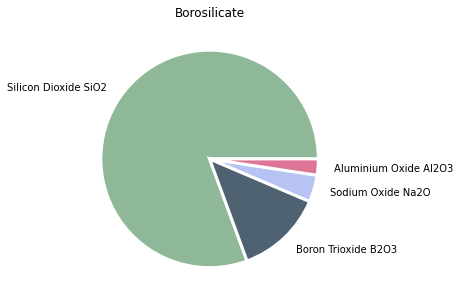

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
#names='Silicon Dioxide SiO2','Boron Trioxide B2O3','Sodium Oxide Na2O','Aluminium Oxide AI2O3',
#values=[80.6,13,4,2.4]
colors = ['#8EB897','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, colors=colors);
plt.title('Borosilicate')
plt.show();

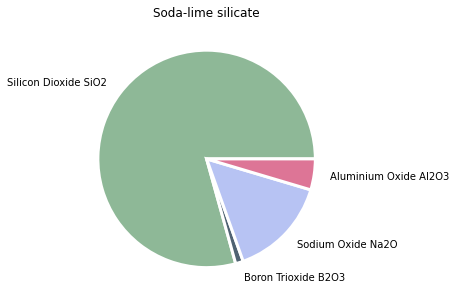

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
names='Silicon Dioxide SiO2','Boron Trioxide B2O3','Sodium Oxide Na2O','Aluminium Oxide AI2O3',
values=[69,1,13,4]
colors = ['#8EB897','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, colors=colors);
plt.title('Soda-lime silicate')
plt.show();

In [ ]:
mergedglass = pd.merge(glasstypes, glasscompounds, how='outer', on=['Glass Type'], indicator='present')
mergedglass

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3,present
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...,80.6,13.0,4.0,2.4,both
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...,69.0,1.0,13.0,4.0,both
2,Phosphates,P2O5,-90-110 x 10-7/°C,Low,"Low, except high resistance to hydrofluoric acid",Bone scaffolds\nOptical fibers\nHeat absorbers,NaN,NaN,NaN,NaN,left_only


In [ ]:
mergedglass.present.value_counts(sort=False)
#expected not to merge on Phosphates, as there was no data given on the second table

left_only     1
right_only    0
both          2
Name: present, dtype: int64

In [ ]:
mergedglass = pd.merge(glasstypes, glasscompounds, how='inner', on=['Glass Type'], indicator='present')
mergedglass

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3,present
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...,80.6,13,4,2.4,both
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...,69.0,1,13,4.0,both


Plastic is not an option for company, so if the question arises have data avaliable for questions!

- find some sort of data showing why plastic is not an option
- maybe a customer survey